In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

Importing the dataset

In [2]:
netflix_titles= pd.read_csv(r"Dataset\netflix_titles.csv")

In [12]:
netflix_titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
netflix_titles.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


Preprocessing:

Listed Genres Column:

In [3]:
#split every entity of column
netflix_titles['listed_in']= netflix_titles['listed_in'].replace("'", "").str.split(', ')
netflix_titles['listed_in']

0                                         [Documentaries]
1       [International TV Shows, TV Dramas, TV Mysteries]
2       [Crime TV Shows, International TV Shows, TV Ac...
3                                [Docuseries, Reality TV]
4       [International TV Shows, Romantic TV Shows, TV...
                              ...                        
8802                     [Cult Movies, Dramas, Thrillers]
8803             [Kids' TV, Korean TV Shows, TV Comedies]
8804                            [Comedies, Horror Movies]
8805                 [Children & Family Movies, Comedies]
8806     [Dramas, International Movies, Music & Musicals]
Name: listed_in, Length: 8807, dtype: object

Converting and Extracting Year from Date Added:

* Splits the 'date_added' column into date and year components (though this split isn't used further in the provided snippet).
* Converts the 'date_added' column to datetime objects using a mixed format to handle variations.
* Extracts the year from the datetime objects and stores it in a new 'year_added' column as an integer type that can handle missing values (Int64).


In [4]:
split_date= netflix_titles['date_added'].str.split(', ')
netflix_titles['date_added']=pd.to_datetime(netflix_titles['date_added'], format='mixed')
netflix_titles['year_added']= netflix_titles['date_added'].dt.year.astype('Int64')

Cast Column

In [5]:
netflix_titles['cast']
netflix_titles['cast']= netflix_titles['cast'].replace("'", "").str.split(", ")

Country Column

In [6]:
netflix_titles.groupby('country') ['title'].count()
netflix_titles['country']= netflix_titles['country'].replace("'", "").str.split(', ')

netflix_titles['country']= netflix_titles['country'].apply(lambda x: x if isinstance(x, list) else [])

Data Analysis and Findings:

In [18]:
netflix_titles.shape

(8807, 13)

In [19]:
netflix_titles.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         8807
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
year_added      8797
dtype: int64

In [20]:
#.size returns rows*columns
netflix_titles.size

114491

In [21]:
netflix_titles.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added'],
      dtype='object')

In [22]:
netflix_titles.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added               Int64
dtype: object

In [23]:
netflix_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8797 non-null   Int64         
dtypes: Int64(1), datetime64[ns](1), int64(1), object(10)
memory usage: 903.2+ KB


Q: Determine the total number of Movies and TV shows present in the dataset?

In [24]:
netflix_titles['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Q: How many Movies and TV shows are released each year? 

In [29]:
netflix_titles.groupby('release_year') ['type'].count()

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: type, Length: 74, dtype: int64

Q: Display the distinct release years represented in the dataset?

In [3]:
netflix_titles['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

Q: List the number of directors represented in the dataset?

In [40]:
len(netflix_titles['director'].unique())

4529

Q: What are the top 5 most frequent genres on Netflix, and how many times do each of those genres appear?

In [25]:
genre_counter=Counter()

for genres in netflix_titles['listed_in']:

    if isinstance(genres, list):

        for genre in genres:
            
            genre_counter[genre.strip()]+=1

genre_counter.most_common(5)


[('International Movies', 2752),
 ('Dramas', 2427),
 ('Comedies', 1674),
 ('International TV Shows', 1351),
 ('Documentaries', 869)]

Q: How many titles were added to Netflix each year?

In [7]:
netflix_titles.groupby('year_added') ['title'].count().sort_values(ascending=False)

year_added
2019    2016
2020    1879
2018    1649
2021    1498
2017    1188
2016     429
2015      82
2014      24
2011      13
2013      11
2012       3
2008       2
2009       2
2010       1
Name: title, dtype: int64

Q: In how many movies/shows, Om Puri was cast?

In [100]:
actor_counter= Counter()

for actors in netflix_titles['cast']:

    if isinstance(actors, list):

        for actor in actors:

            actor_counter[actor.strip()]+=1

if '' in actor_counter:
    del actor_counter['']


print(f"Om Puri was casted in {actor_counter['Om Puri']} Movies/TV Shows")

            

Om Puri was casted in 30 Movies/TV Shows


In [8]:
netflix_titles.groupby(['rating', 'type']) ['type'].count().sort_values(ascending=False)

rating    type   
TV-MA     Movie      2062
TV-14     Movie      1427
TV-MA     TV Show    1145
R         Movie       797
TV-14     TV Show     733
TV-PG     Movie       540
PG-13     Movie       490
TV-PG     TV Show     323
PG        Movie       287
TV-Y7     TV Show     195
TV-Y      TV Show     176
TV-Y7     Movie       139
TV-Y      Movie       131
TV-G      Movie       126
          TV Show      94
NR        Movie        75
G         Movie        41
NR        TV Show       5
TV-Y7-FV  Movie         5
UR        Movie         3
NC-17     Movie         3
R         TV Show       2
84 min    Movie         1
74 min    Movie         1
66 min    Movie         1
TV-Y7-FV  TV Show       1
Name: type, dtype: int64

Q: What are the top 5 countries that produce the most content on Netflix, and how many titles does each of those countries contribute?

In [13]:
import numpy as np

country_counter=Counter()

for countries in netflix_titles['country']:

    if isinstance(countries, list):

        for country in countries:

            country_counter[country.strip()]+=1

keys_to_remove=['', np.nan, pd.NA]

for key in keys_to_remove:

    if key in country_counter:

        del country_counter[key]
            

country_counter.most_common(5)


[('United States', 3689),
 ('India', 1046),
 ('United Kingdom', 804),
 ('Canada', 445),
 ('France', 393)]

Making a new Dataframe using explode;

In [5]:
df_exploded= netflix_titles.explode('listed_in')

In [7]:
len(df_exploded)

8807

In [218]:
df_exploded['listed_in']= df_exploded['listed_in'].str.strip()

Q: How many titles of each type (Movie/TV Show) are in each genre?

In [238]:
df_exploded.groupby(['listed_in', 'type']) ['type'].count()

listed_in                     type   
Action & Adventure            Movie       859
Anime Features                Movie        71
Anime Series                  TV Show     176
British TV Shows              TV Show     253
Children & Family Movies      Movie       641
Classic & Cult TV             TV Show      28
Classic Movies                Movie       116
Comedies                      Movie      1674
Crime TV Shows                TV Show     470
Cult Movies                   Movie        71
Documentaries                 Movie       869
Docuseries                    TV Show     395
Dramas                        Movie      2427
Faith & Spirituality          Movie        65
Horror Movies                 Movie       357
Independent Movies            Movie       756
International Movies          Movie      2752
International TV Shows        TV Show    1351
Kids' TV                      TV Show     451
Korean TV Shows               TV Show     151
LGBTQ Movies                  Movie       

Q: Is there any Duplicate Record in this dataset ? If yes, then remove the duplicate records.

In [ ]:
#No duplicates in data
netflix_titles.drop_duplicates()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Q:  For 'House of Cards', what is the Show Id and Who is the Director of this show?

In [9]:
netflix_titles.loc[netflix_titles['title'] == 'House of Cards', ['show_id', 'director']]

,show_id,director
1059,s1060,NaN


Q: In which year the highest number of the TV Shows & Movies were released ? Show with Bar Graph.

In [10]:
netflix_titles.groupby('release_year') ['type'].count().sort_values(ascending=False).head(1)

release_year
2018    1147
Name: type, dtype: int64

Q: How many TV shows and movies were released each year?

In [11]:
a1= netflix_titles.groupby(['release_year', 'type']) ['type'].count()

In [12]:
a1

release_year  type   
1925          TV Show      1
1942          Movie        2
1943          Movie        3
1944          Movie        3
1945          Movie        3
                        ... 
2019          TV Show    397
2020          Movie      517
              TV Show    436
2021          Movie      277
              TV Show    315
Name: type, Length: 119, dtype: int64

Q: Show how many Movies and TV Shows were released each year in form of a bar chart?

<Axes: xlabel='release_year'>

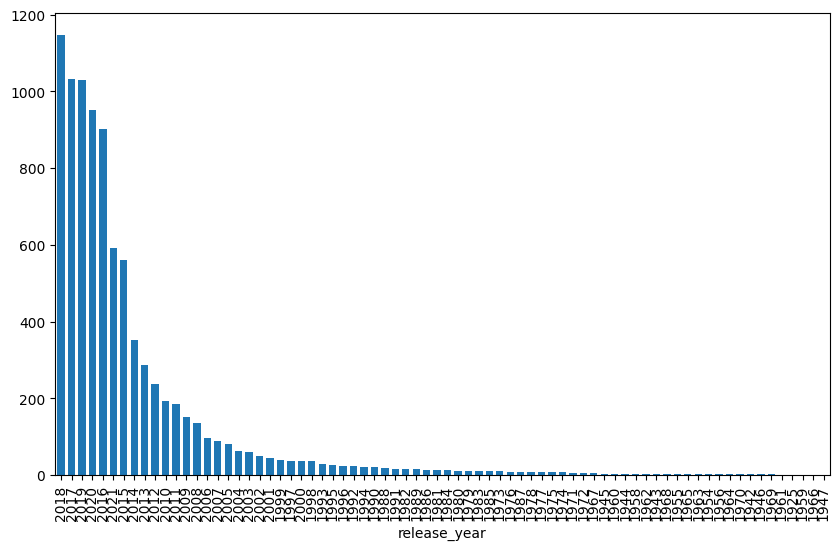

In [ ]:
fig= plt.subplots(figsize=(10, 6))

netflix_titles['release_year'].value_counts().plot(kind='bar', width=0.7)

Q: How many Movies & TV Shows are in the dataset ? Show with Bar Graph.

<Axes: xlabel='type'>

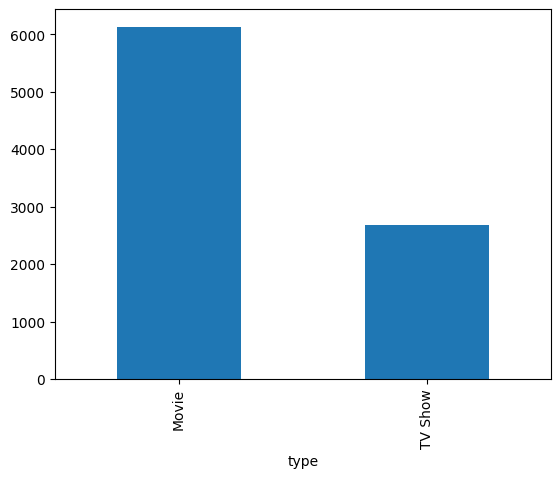

In [57]:
netflix_titles['type'].value_counts().plot(kind='bar')

Q: Show all the Movies and TV Shows that were released in year 2020.

In [68]:
netflix_titles[netflix_titles['release_year'] == 2020]['title']

0                                    Dick Johnson Is Dead
16      Europe's Most Dangerous Man: Otto Skorzeny in ...
17                                        Falsa identidad
32                                          Sex Education
34                                Tayo and Little Wizards
                              ...                        
5972                                     #cats_the_mewvie
7594                   Norm of the North: Family Vacation
8099                                          Straight Up
8125                                          Super Wings
8132            Surviving R. Kelly Part II: The Reckoning
Name: title, Length: 953, dtype: object

Q: Show only the Titles of all Movies and TV Shows that were released in India only.

In [87]:
netflix_titles[netflix_titles['country'] == 'India']['title']

4                        Kota Factory
24                              Jeans
39                       Chhota Bheem
50                      Dharmakshetra
66      Raja Rasoi Aur Anya Kahaniyan
                    ...              
8773              Yanda Kartavya Aahe
8775                  Yeh Meri Family
8798                         Zed Plus
8799                            Zenda
8806                           Zubaan
Name: title, Length: 972, dtype: object

Q: Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?

In [93]:
netflix_titles['director'].value_counts().sort_values(ascending=False).head(10)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64

Custom Exploding Function for DataFrames

Description:
The custom_explode function expands a DataFrame based on two columns (col1, col2) containing lists. It creates new rows by pairing elements from both lists, handling different list lengths and empty values.  It returns a new, expanded DataFrame.

In [13]:
def custom_explode(df, col1, col2):
    new_rows=[]

    for _, row in df.iterrows():

        lencol1= len(row[col1])
        lencol2= len(row[col2])
        
        if lencol1 >0 and lencol2 >0:
            for i in range(max(lencol1, lencol2)):
                
                new_row= row.copy()
                new_row[col1]= row[col1][i % lencol1]
                new_row[col2]= row[col2][i % lencol2]

                new_rows.append(new_row)
        
        elif lencol1>0:
            
            for j in range(lencol1):
                new_row= row.copy()
                new_row[col1]= row[col1][j]
                new_rows.append(new_row)

        elif lencol2 >0:

            for k in range(lencol2):

                new_row= row.copy()
                new_row[col2]= row[col2][k]
                new_rows.append(new_row)

        else:
            new_rows.append(row.to_dict())                

    return pd.DataFrame(new_rows)




In [14]:
exploded_df1= custom_explode(netflix_titles, 'listed_in', 'country')

In [15]:
exploded_df1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[],2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",United States,2020-01-11,2006,PG,88 min,Children & Family Movies,"Dragged from civilian life, a former superhero...",2020
8805,s8806,Movie,Zoom,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",United States,2020-01-11,2006,PG,88 min,Comedies,"Dragged from civilian life, a former superhero...",2020
8806,s8807,Movie,Zubaan,Mozez Singh,"[Vicky Kaushal, Sarah-Jane Dias, Raaghav Chana...",India,2019-03-02,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,2019
8806,s8807,Movie,Zubaan,Mozez Singh,"[Vicky Kaushal, Sarah-Jane Dias, Raaghav Chana...",India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,2019


In [16]:
exploded_df= exploded_df1.reset_index(drop=True)

In [70]:
exploded_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[],"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...
...,...,...,...,...,...,...,...,...,...,...,...,...
20147,s8806,Movie,Zoom,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",United States,"January 11, 2020",2006,PG,88 min,Children & Family Movies,"Dragged from civilian life, a former superhero..."
20148,s8806,Movie,Zoom,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",United States,"January 11, 2020",2006,PG,88 min,Comedies,"Dragged from civilian life, a former superhero..."
20149,s8807,Movie,Zubaan,Mozez Singh,"[Vicky Kaushal, Sarah-Jane Dias, Raaghav Chana...",India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
20150,s8807,Movie,Zubaan,Mozez Singh,"[Vicky Kaushal, Sarah-Jane Dias, Raaghav Chana...",India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


Q: Identify all movies in the Netflix dataset that are classified as 'Music & Musicals', produced in India.

In [17]:
exploded_df[((exploded_df['type'] == 'Movie') & (exploded_df['listed_in'] == 'Music & Musicals')) & (exploded_df['country'] == 'India')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
472,s203,Movie,Kyaa Kool Hai Hum,Sangeeth Sivan,"[Tusshar Kapoor, Riteish Deshmukh, Isha Koppik...",India,2021-08-27,2005,TV-MA,165 min,Music & Musicals,Longtime friends Rahul and Karan head to Mumba...,2021
485,s208,Movie,Mission Istaanbul: Darr Ke Aagey Jeet Hai,Apoorva Lakhia,"[Vivek Oberoi, Zayed Khan, Shriya Saran, Nikit...",India,2021-08-27,2008,TV-14,119 min,Music & Musicals,A television journalist makes a risky career m...,2021
488,s209,Movie,Once Upon a Time in Mumbaai,Milan Luthria,"[Ajay Devgn, Emraan Hashmi, Kangana Ranaut, Pr...",India,2021-08-27,2010,TV-14,133 min,Music & Musicals,Mumbai's top mob boss rules the underworld wit...,2021
491,s210,Movie,Once Upon a Time in Mumbai Dobaara!,Milan Luthria,"[Akshay Kumar, Imran Khan, Sonakshi Sinha, Son...",India,2021-08-27,2013,TV-14,142 min,Music & Musicals,This turbulent sequel to Once Upon a Time in M...,2021
1950,s851,Movie,99 Songs,Vishwesh Krishnamoorthy,"[Ehan Bhat, Edilsy Vargas, Manisha Koirala, Li...",India,2021-05-21,2021,TV-14,131 min,Music & Musicals,Challenged to compose 100 songs before he can ...,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18649,s8162,Movie,Tees Maar Khan,Farah Khan,"[Katrina Kaif, Akshay Kumar, Akshaye Khanna, A...",India,2018-08-02,2010,TV-PG,125 min,Music & Musicals,A flamboyant con artist and his band of gleefu...,2018
19084,s8351,Movie,The Human Factor: The Untold Story of the Bomb...,Rudradeep Bhattacharjee,NaN,India,2017-04-01,2013,TV-PG,53 min,Music & Musicals,A family of Parsi musicians collectively works...,2017
19448,s8505,Movie,The Shaukeens,Abhishek Sharma,"[Akshay Kumar, Annu Kapoor, Piyush Mishra, Lis...",India,2018-03-01,2014,TV-MA,123 min,Music & Musicals,Three sexually frustrated men in their 60s hav...,2018
20064,s8772,Movie,Yaara O Dildaara,Ksshitij Chaudhary,"[Harbhajan Mann, Tulip Joshi, Kabir Bedi, Gulz...",India,2017-11-01,2011,TV-14,132 min,Music & Musicals,The patriarch of a wealthy family with one ind...,2017


Q:  How many Movies got the 'TV-14' rating, in Canada?

In [18]:
len(exploded_df[(exploded_df['rating'] == 'TV-14') & (exploded_df['country'] == 'Canada')])

82

Q: How many TV Shows got the 'R' rating, after year 2018(include year 2018)?

In [19]:
len(exploded_df[(exploded_df['rating'] == 'R') & (exploded_df['release_year'] >= 2018)])

312

Q: Sort the dataset by Year?

In [20]:
netflix_titles.sort_values('release_year')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,[],2018-12-30,1925,TV-14,1 Season,[TV Shows],This collection restores films from women who ...,2018
7790,s7791,Movie,Prelude to War,Frank Capra,NaN,[United States],2017-03-31,1942,TV-14,52 min,"[Classic Movies, Documentaries]",Frank Capra's documentary chronicles the rise ...,2017
8205,s8206,Movie,The Battle of Midway,John Ford,"[Henry Fonda, Jane Darwell]",[United States],2017-03-31,1942,TV-14,18 min,"[Classic Movies, Documentaries]",Director John Ford captures combat footage of ...,2017
8739,s8740,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",NaN,[United States],2017-03-31,1943,TV-PG,82 min,[Documentaries],This installment of Frank Capra's acclaimed do...,2017
8763,s8764,Movie,WWII: Report from the Aleutians,John Huston,NaN,[United States],2017-03-31,1943,TV-PG,45 min,[Documentaries],Filmmaker John Huston narrates this Oscar-nomi...,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,[],2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[],2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...,2021
18,s19,Movie,Intrusion,Adam Salky,"[Freida Pinto, Logan Marshall-Green, Robert Jo...",[],2021-09-22,2021,TV-14,94 min,[Thrillers],After a deadly home invasion at a couple’s new...,2021
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t...",2021


Q: What is the maximum duration of a movie on Netflix?

Filters the netflix_titles DataFrame to create a movies DataFrame containing only movies.  It then extracts the duration value and unit (minutes or seasons) from the duration column into new duration_value and duration_unit columns.

In [21]:
movies= netflix_titles[netflix_titles['type'] == 'Movie'].copy()

In [22]:
movies[['duration_value', 'duration_unit']] = movies['duration'].str.extract(r'(\d+) (min|Season(?:s)?)', expand=True)

In [23]:
movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,duration_value,duration_unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,[United States],2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",2021,90,min
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","[Vanessa Hudgens, Kimiko Glenn, James Marsden,...",[],2021-09-24,2021,PG,91 min,[Children & Family Movies],Equestria's divided. But a bright-eyed hero be...,2021,91,min
7,s8,Movie,Sankofa,Haile Gerima,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...","[United States, Ghana, Burkina Faso, United Ki...",2021-09-24,1993,TV-MA,125 min,"[Dramas, Independent Movies, International Mov...","On a photo shoot in Ghana, an American model s...",2021,125,min
9,s10,Movie,The Starling,Theodore Melfi,"[Melissa McCarthy, Chris O'Dowd, Kevin Kline, ...",[United States],2021-09-24,2021,PG-13,104 min,"[Comedies, Dramas]",A woman adjusting to life after a loss contend...,2021,104,min
12,s13,Movie,Je Suis Karl,Christian Schwochow,"[Luna Wedler, Jannis Niewöhner, Milan Peschel,...","[Germany, Czech Republic]",2021-09-23,2021,TV-MA,127 min,"[Dramas, International Movies]",After most of her family is murdered in a terr...,2021,127,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"[Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri,...","[United Arab Emirates, Jordan]",2016-03-09,2015,TV-MA,96 min,"[Dramas, International Movies, Thrillers]",Recovering alcoholic Talal wakes up inside a s...,2016,96,min
8802,s8803,Movie,Zodiac,David Fincher,"[Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...",[United States],2019-11-20,2007,R,158 min,"[Cult Movies, Dramas, Thrillers]","A political cartoonist, a crime reporter and a...",2019,158,min
8804,s8805,Movie,Zombieland,Ruben Fleischer,"[Jesse Eisenberg, Woody Harrelson, Emma Stone,...",[United States],2019-11-01,2009,R,88 min,"[Comedies, Horror Movies]",Looking to survive in a world taken over by zo...,2019,88,min
8805,s8806,Movie,Zoom,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",[United States],2020-01-11,2006,PG,88 min,"[Children & Family Movies, Comedies]","Dragged from civilian life, a former superhero...",2020,88,min


In [24]:
movies['duration_value']=pd.to_numeric(movies['duration_value'])

print(f"Maximum duration of a movie is {movies['duration_value'].max()} minutes.")

Maximum duration of a movie is 312.0 minutes.


Q: What is the maximum duration of a TV show on Netflix?

Filters the netflix_titles DataFrame to create a TV_shows DataFrame containing only TV Shows. It then extracts the duration value and unit (minutes or seasons) from the duration column into new duration_value and duration_unit columns.

In [3]:
TV_shows= netflix_titles[netflix_titles['type'] == 'TV Show'].copy()

In [4]:
TV_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [5]:
TV_shows[['duration_value', 'duration_unit']]= TV_shows['duration'].str.extract(r'(\d+) (:min|Season(?:s)?)', expand=True)

In [149]:
TV_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_value,duration_unit
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t...",2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[],"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...,1,Season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,[],"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",1,Season
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...,2,Seasons
5,s6,TV Show,Midnight Mass,Mike Flanagan,"[Kate Siegel, Zach Gilford, Hamish Linklater, ...",[],"September 24, 2021",2021,TV-MA,1 Season,"[TV Dramas, TV Horror, TV Mysteries]",The arrival of a charismatic young priest brin...,1,Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"[Mike Liscio, Emily Bauer, Billy Bob Thompson,...","[Japan, Canada]","May 1, 2018",2015,TV-Y7,2 Seasons,"[Anime Series, Kids' TV]",Now that he's discovered the Pendulum Summonin...,2,Seasons
8796,s8797,TV Show,Yunus Emre,NaN,"[Gökhan Atalay, Payidar Tüfekçioglu, Baran Akb...",[Turkey],"January 17, 2017",2016,TV-PG,2 Seasons,"[International TV Shows, TV Dramas]","During the Mongol invasions, Yunus Emre leaves...",2,Seasons
8797,s8798,TV Show,Zak Storm,NaN,"[Michael Johnston, Jessica Gee-George, Christi...","[United States, France, South Korea, Indonesia]","September 13, 2018",2016,TV-Y7,3 Seasons,[Kids' TV],Teen surfer Zak Storm is mysteriously transpor...,3,Seasons
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"[Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen...",[Pakistan],"December 15, 2016",2012,TV-PG,1 Season,"[International TV Shows, Romantic TV Shows, TV...","Strong-willed, middle-class Kashaf and carefre...",1,Season


In [6]:
print(f"Maximum duration of Tv Shows is {TV_shows['duration_value'].max()} seasons.")

Maximum duration of Tv Shows is 9 seasons.


Q: Is there any Null Value present in any column? Show in form of a bar chart.

In [3]:
missing_values= netflix_titles.isnull().sum()
missing_df = pd.DataFrame(missing_values, columns=['Missing Value(count)'])

In [4]:
missing_df

,Missing Value(count)
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


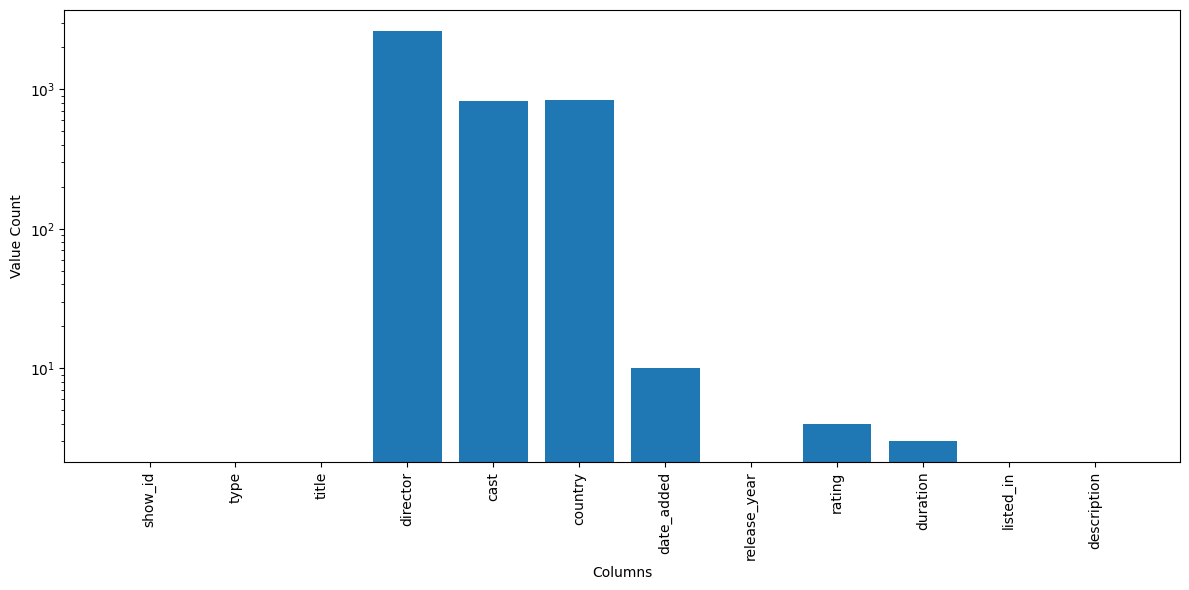

In [8]:
plt.figure(figsize=(12, 6))
plt.bar(missing_df.index, missing_df['Missing Value(count)'])
plt.yscale('log')
plt.xlabel('Columns')
plt.ylabel('Value Count')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()